# openCV와 dlib를 이용한 얼굴인식 예제

#### 초록
***
<span style="font-size:11pt; line-height:1.8;">
    &nbsp; &nbsp; dlib의 얼굴인식 및 얼굴 랜드마크 검출 기능을 활용하여 다양한 변수에서의 인식 성능을 확인하였다. 변수는 '안경을 낀 경우', '두 명 이상인 경우', '얼굴의 각도 및 구도가 다양한 경우', '주변이 어두운 환경인 경우', '얼굴의 일부가 크롭된 이미지인 경우'로 구분하여 얼굴인식 여부를 확인하였다. 그 결과, '이목구비가 완전하게 나오지 않을 때', '90˚에서 180˚로 얼굴이 회전되어 있을 때' 얼굴을 인식하지 못하였다. 또한, '고양이 수염' 이미지를 얼굴의 적절한 위치에 합성하는 예제를 진행하였다. 얼굴의 크기와 각도, 구도는 이미지에 따라 항상 다르기 때문에 이를 고려하여 '고양이 수염' 이미지의 사이즈와 각도 원근 정도를 변형하여 합성을 시행하였다.
</span><br><br>

***

### 1. 서론
***
<span style="font-size:12pt; line-height:1.5; font-family:Serif;">
    &nbsp; &nbsp; 본 예제에서는 openCV와 dlib 라이브러리를 이용하여 얼굴인식 알고리즘의 인식 성능에 대해 알아본다. 나아가 해당 라이브러리를 활용하여 얼굴인식을 통한 이미지 합성 예제를 진행한다.
</span><br><br>

<span style="font-size:12pt; line-height:1.5; font-family:Serif;">
    &nbsp; &nbsp; 인식 성능을 판단하기 위해 다양한 변수에 따른 얼굴인식 여부를 확인한다. 따라서, 변수를 다음과 같이, '안경착용에 따른 인식 여부', '다수의 인원에 따른 인식 여부', '구도 및 각도에 따른 인식 여부', '밝기에 따른 인식 여부', '얼굴의 일부만 보일 때 인식 여부'로 구분하여 얼굴인식 성능을 판단하고자 한다.
</span><br><br>

<span style="font-size:12pt; line-height:1.5; font-family:Serif;">
    &nbsp; &nbsp; 이미지 합성 예제는 얼굴인식을 통해 '고양이 수염' 이미지를 얼굴의 적절한 위치에 합성하는 것을 목적으로 한다. 이미지를 적절한 위치에 합성하기 위해, 얼굴의 크기와 각도를 고려하여 '고양이 수염' 이미지를 변형하여 적용하는 과정을 거친 후 합성을 진행한다.
</span>

***

### 2. 활용 이미지 데이터
***
<span style="font-size:12pt; line-height:1.5; font-family:Serif;">
    &nbsp; &nbsp; 본 예제에서는 'Helen dataset'의 이미지 일부를 사용하였다. 'Helen dataset'은 인터넷으로부터 다양한 키워드를 검색하여 다양한 후보사진의 수집으로 구성된 이미지 데이터셋이다. 2,000장의 훈련 이미지와 330장의 테스트 이미지로 총 2,330장의 이미지로 구성되어있다. 또한, 이미지 처리 분야에서 자주 활용되는 'Lenna' 이미지를 사용하였다.
</span>

***

#### 이미지 데이터 출처
***
"Helen dataset", illinois, last modified, , accessed Sep, 30, 2021, http://www.ifp.illinois.edu/~vuongle2/helen/

"Miscellaneous", USCviterbi, last modified, , accessed Sep, 30, 2021, http://sipi.usc.edu/database/database.php?volume=misc&image=12
***

### 3. dlib 얼굴검출
***
<span style="font-size:12pt; line-height:1.5; font-family:Serif;">
    &nbsp; &nbsp; dlib 라이브러리를 통해 이미지로부터 얼굴을 검출한다. 이미지는 항상 너비(width)를 640px로 리사이즈하였으며 동시에 높이(height)는 원본 비율을 적용하였다. 얼굴 검출 모델은 68개의 랜드마크를 반환하는 '68_face_landmarks'를 사용하였다. 얼굴검출 방식은 얼굴의 위치를 찾아 박스형태로 반환하면, 해당 박스 내부에서 랜드마크를 추출하는 순으로 진행된다.
</span>

***

#### 라이브러리 호출

In [1]:
import os   #디렉토리 관리
import cv2   #이미지 처리
import math   #연산처리
import numpy as np   #배열 처리
import dlib   #SVM의 sliding window로 얼굴을 찾는 라이브러리
import matplotlib.pyplot as plt   #그래프 및 시각화

#### 모델 호출

In [2]:
model_path = "./module/shape_predictor_68_face_landmarks.dat"
landmark_predictor = dlib.shape_predictor(model_path)
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

#### 이미지 출력
***
+ 'Lenna' 이미지를 출력한다.
***

origin_size: 512 * 512 ===> resize: 640 * 640


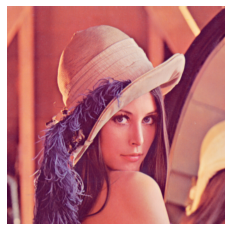

In [3]:
#이미지 사이즈 조정 함수=============================
def resize_img(img, width, verb=True):
    w, h, _ = img.shape   #이미지 사이즈 취득
    new_size = int(w * width / h)
    
    if verb:
        print("origin_size: {0} * {1} ===> resize: 640 * {2}".format(w, h, new_size))

    img = cv2.resize(img, (width, new_size))   #height 비율에 맞춰 사이즈 조정
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   #RGB 형태로 변환
    return img
#End=================================================

my_image_path = "./img/imgset/lena/lena.png"
img = cv2.imread(my_image_path)

img = resize_img(img, 640)
plt.imshow(img)
plt.axis('off')
plt.show()

#### 얼굴영역 검출
***
+ 얼굴영역을 두 개의 좌표로 반환한다.
***

rectangles[[(283, 284) (469, 469)]]
1


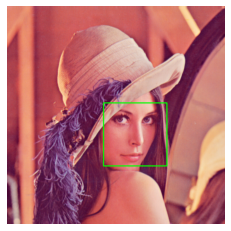

In [4]:
c_img = img.copy()
dlib_rects = detector_hog(c_img, 1)   #(img, img 파라미드의 수)
#이미지 파라미드: 업샘플링을통해 크기를 키우는 것

print(dlib_rects)   # 찾은 얼굴영역 좌표
print(len(dlib_rects))

#인식 영역을 그려주는 부분, 한 명일 때는 dlib_rects의 len = 1
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    #rectangle(img, 시작좌표(x,y), 종료 좌표(x, y), 색상, thickness(선 두께), 선종류)
    cv2.rectangle(c_img, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

plt.imshow(c_img)
plt.axis('off')
plt.show()

#### 랜드마크 검출
***
+ 얼굴의 각 68개 랜드마크 좌표를 반환한다.
***

68


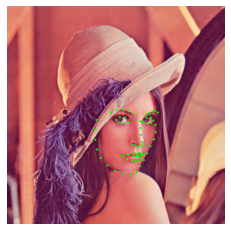

In [5]:
c_img = img.copy()

def get_landmark(img):
    dlib_rects = detector_hog(img, 1)
    
    list_landmarks = []
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)
    return list_landmarks

list_landmarks = get_landmark(c_img)

print(len(list_landmarks[0]))

for landmark in list_landmarks:
    for point in landmark:
        #circle(img, 좌표(x, y), 반지름, 컬러, line_type)
        cv2.circle(c_img, point, 3, (0, 255, 0), -1) # yellow

plt.imshow(c_img)
plt.axis('off')
plt.show()

### 4. 다양한 변수에 따른 얼굴인식 여부 분석
***
<span style="font-size:12pt; line-height:1.5; font-family:Serif;">
    &nbsp; &nbsp; 이미지의 얼굴은 항상 정면을 향해있지 않으며, 얼굴의 구도, 크기 등에 따라 매우 다양한 형태로 표현되어진다. 따라서 본 절에서는 '안경을 착용했을 때', '다수의 인원일 때', '다양한 구도 및 각도일 때', '밝기가 다를 때', '얼굴의 일부만 보일 때'로 변수를 구분하여 얼굴인식이 이루어지는지 확인하고자 한다.
</span>

***

#### 이미지 호출 및 이미지 시각화 함수
***
+ 자주사용되는 '변수에 따른 이미지 호출 기능'과 '이미지 시각화 기능'을 함수화 하였다.
***

In [6]:
def get_img_data(path):   #디렉토리로부터 이미지를 가져와 반환하는 함수
    img_names = os.listdir(path)
    return_img = []
    for img_name in img_names:
        img = cv2.imread(path + "/" + img_name)
        
        w, h, _ = img.shape   #이미지 사이즈 취득
        new_size = int(w * 640 / h)

        img = cv2.resize(img, (640, new_size))   #height 비율에 맞춰 사이즈 조정
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   #RGB 형태로 변환
        
        return_img.append(img) 
    return return_img


def show_img_list(img_list):
    paper = len(img_list)
    if paper % 2 == 0:
        row, col = 2, int(paper / 2)
    else:
        row, col = 1, paper
        
    plt.figure(figsize=(15, 7))
    for idx, img in enumerate(img_list):
        plt.subplot(row, col, idx + 1)
        plt.title("IMAGE " + str(idx))
        plt.imshow(img)
        plt.axis("off")
    plt.show()
    return

#### 4.1 안경 착용 여부에 따른 인식 확인
***
<span style="font-size:12pt; line-height:1.5; font-family:Serif;">
    &nbsp; &nbsp; 안경 착용 시, 얼굴 인식 여부를 확인한다. 6개의 테스트 이미지를 사용하였으며, 모두 올바르게 인식한 것을 확인 할 수 있다. 특히, 안경과 눈을 혼동하지 않고 눈을 잘 식별하여 랜드마크를 생성한 것을 볼 수 있다.
</span>

***

#### 4.1.1 데이터 확인

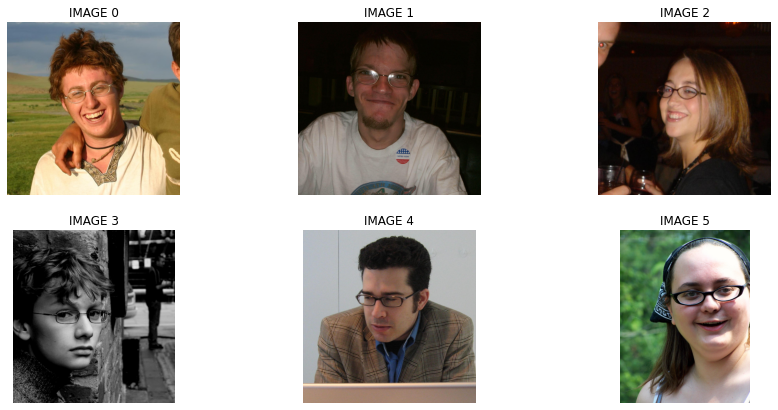

In [7]:
img_list = get_img_data("./img/imgset/glass/")
show_img_list(img_list)   #이미지 시각화

#### 4.1.2 랜드마크 검출

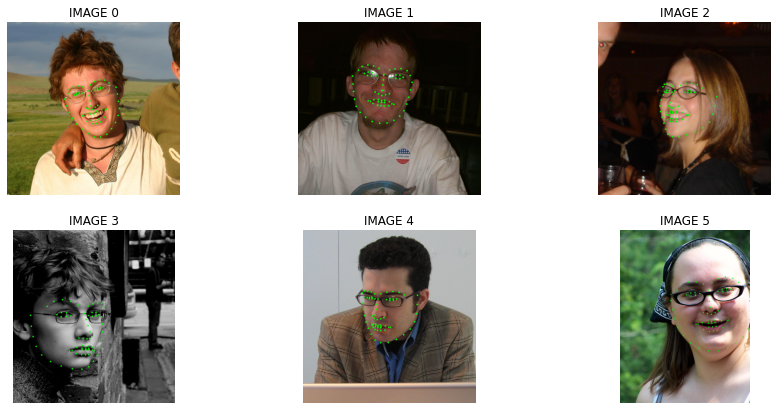

In [8]:
land_img_list = img_list.copy()

#랜드마크 등록
for img in land_img_list:
    list_landmarks = get_landmark(img)
        
    for landmark in list_landmarks:
        for point in landmark:
            #circle(img, 좌표(x, y), 반지름, 컬러, line_type)
            cv2.circle(img, point, 3, (0, 255, 0), -1)
        
show_img_list(land_img_list)   #이미지 시각화

#### 4.1 한 명 이상일 경우 얼굴인식 확인
***
<span style="font-size:12pt; line-height:1.5; font-family:Serif;">
    &nbsp; &nbsp; 한 명 이상의 인물이 있을 경우 얼굴인식 여부를 확인한다. 3개의 테스트 이미지를 사용하였으며, 모두 올바르게 인식한 것을 확인 할 수 있다. 인원의 수에 상관없이 얼굴 인식이 이루어진 것 을 확인할 수 있다.
</span>

***

#### 4.1.1 데이터 확인

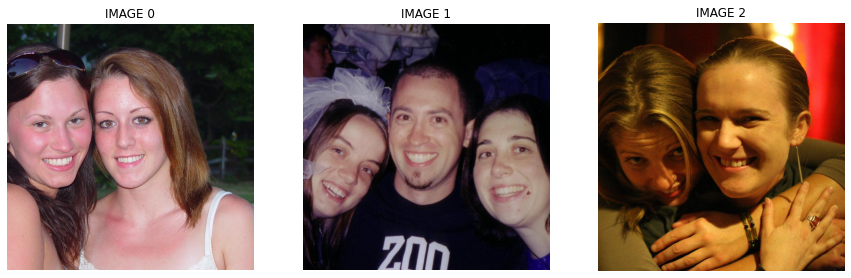

In [9]:
img_list = get_img_data("./img/imgset/many/")
show_img_list(img_list)   #이미지 시각화

#### 4.1.2 랜드마크 검출

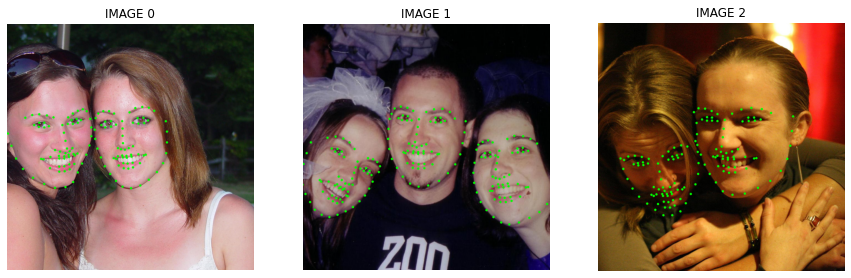

In [10]:
land_img_list = img_list.copy()

#랜드마크 등록
for img in land_img_list:
    list_landmarks = get_landmark(img)
        
    for landmark in list_landmarks:
        for point in landmark:
            cv2.circle(img, point, 3, (0, 255, 0), -1)
        
show_img_list(land_img_list)   #이미지 시각화

#### 4.1 구도 및 각도에 따른 얼굴인식 확인
***
<span style="font-size:12pt; line-height:1.5; font-family:Serif;">
    &nbsp; &nbsp; 얼굴의 구도와 각도에 따른 얼굴인식 여부를 확인한다. 5개의 이미지를 사용하였으며, 얼굴 각도에 따른 얼굴인식 여부는 'lena.png'를 45˚로 회전시켜 테스트를 진행하였다. 그 결과 구도에 따른 얼굴인식은 올바르게 이루어진 것을 확인할 수 있었다. 그러나 각도를 회전시킨 경우 0˚, 45˚에서는 인식이 잘 이루어졌지만, 90˚에서 180˚ 사이에서의 회전한 이미지는 인식하지 못하였다.
</span>

***

#### 4.1.1 데이터 확인

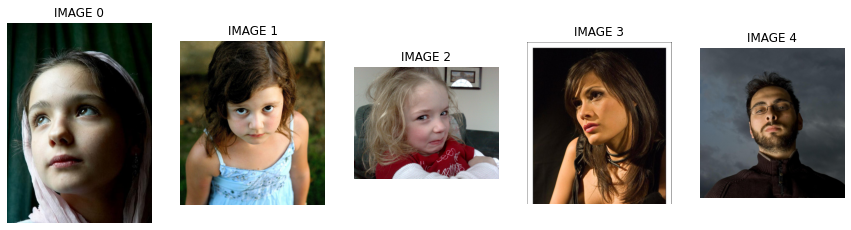

In [11]:
img_list = get_img_data("./img/imgset/angle/")
show_img_list(img_list)   #이미지 시각화

#### 4.1.2 랜드마크 검출

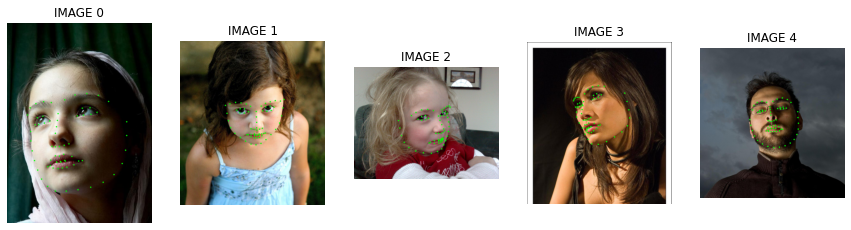

In [12]:
land_img_list = img_list.copy()

#랜드마크 등록
for img in land_img_list:
    list_landmarks = get_landmark(img)
        
    for landmark in list_landmarks:
        for point in landmark:
            cv2.circle(img, point, 3, (0, 255, 0), -1)
        
show_img_list(land_img_list)   #이미지 시각화

#### 4.1.3 각도에 따른 얼굴인식 확인

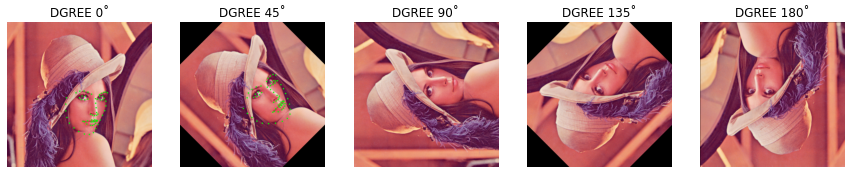

In [13]:
img_list = get_img_data("./img/imgset/lena/")

#이미지 회전 시키기=====================================
for i in range(1, 5):
    center_point = (img_list[0].shape[1] / 2, img_list[0].shape[0] / 2)
    rot = cv2.getRotationMatrix2D(center_point, 45 * i, 1)
    img_list.append(cv2.warpAffine(img_list[0], rot, (0, 0)))
#End====================================================

land_img_list = img_list.copy()

# #랜드마크 등록
for img in land_img_list:
    list_landmarks = get_landmark(img)
        
    for landmark in list_landmarks:
        for point in landmark:
            cv2.circle(img, point, 3, (0, 255, 0), -1)
        

#이미지 시각화================================
img_list_len = len(land_img_list)
plt.figure(figsize=(15, 7))
for idx, img in enumerate(land_img_list):
    plt.subplot(1, img_list_len, idx + 1)
    plt.title("DGREE " + str(idx * 45) + "˚")
    plt.imshow(img)
    plt.axis("off")
plt.show()
#End===========================================

#### 4.1 밝기에 따른 얼굴인식 확인
***
<span style="font-size:12pt; line-height:1.5; font-family:Serif;">
    &nbsp; &nbsp; 밝기에 따른 얼굴인식 여부를 확인한다. 2개의 이미지를 사용하였으며, 어두운 환경에서의 얼굴인식 테스트를 진행하였다. 그 결과 두 이미지 모두 올바르게 얼굴인식이 이루어진 것을 확인할 수 있었다. 특히, 'IMAGE 0'의 경우 얼굴 절반이 그림자에 가려 육안으로 인식하기 어려움에도 불구하고 랜드마크가 잘 형성된 것이 확인 가능하다.
</span>

***

#### 4.1.1 데이터 확인

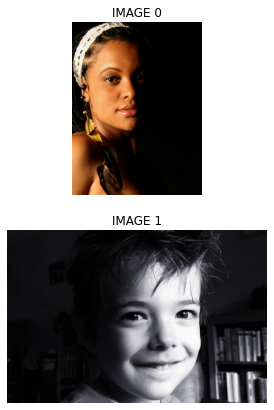

In [14]:
img_list = get_img_data("./img/imgset/lux/")
show_img_list(img_list)   #이미지 시각화

#### 4.1.2 랜드마크 검출

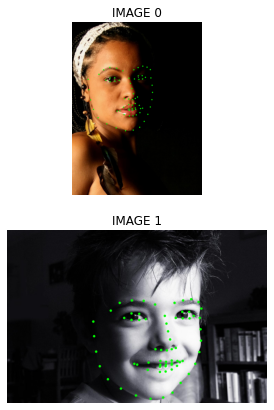

In [15]:
land_img_list = img_list.copy()

#랜드마크 등록
for img in land_img_list:
    list_landmarks = get_landmark(img)
        
    for landmark in list_landmarks:
        for point in landmark:
            cv2.circle(img, point, 3, (0, 255, 0), -1)
        
show_img_list(land_img_list)   #이미지 시각화

#### 4.1 일부가 잘린 이미지에 대한 얼굴 인식 확인
***
<span style="font-size:12pt; line-height:1.5; font-family:Serif;">
    &nbsp; &nbsp; 얼굴의 일부가 크롭된 이미지에 대한 얼굴인식 여부를 확인하였다. 5개의 이미지를 사용하였으며 이목구비가 온전히 보일 경우에만 얼굴인식이 이루어진 것을 확인할 수 있다. 특히, 얼굴의 절반만 나온 경우, 눈, 코만 나온 경우, 입만 나온 경우 모두 인식 하지 못하였다.
</span>

***

#### 4.1.1 데이터 확인

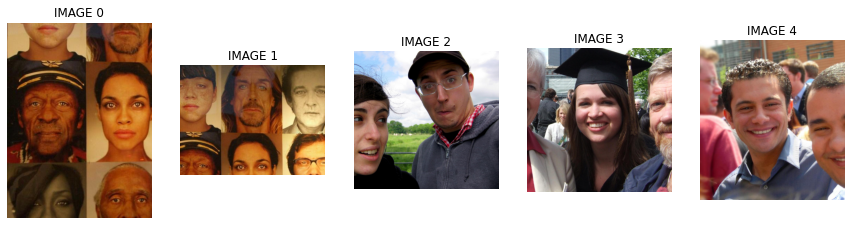

In [16]:
img_list = get_img_data("./img/imgset/cut/")
show_img_list(img_list)   #이미지 시각화

#### 4.1.2 랜드마크 검출

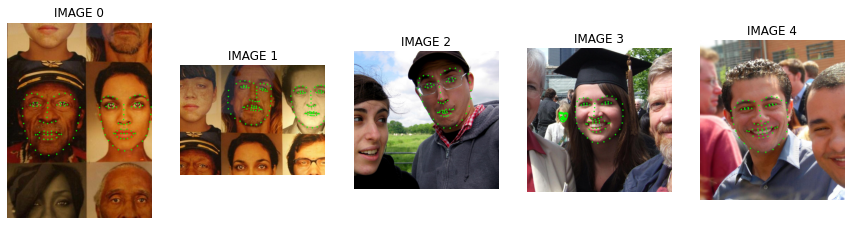

In [17]:
land_img_list = img_list.copy()

#랜드마크 등록
for img in land_img_list:
    list_landmarks = get_landmark(img)
        
    for landmark in list_landmarks:
        for point in landmark:
            cv2.circle(img, point, 3, (0, 255, 0), -1)
        
show_img_list(land_img_list)   #이미지 시각화

### 5. 얼굴인식을 활용한 예제
***
<span style="font-size:12pt; line-height:1.5; font-family:Serif;">
    &nbsp; &nbsp; 본 예제에서는 dlib를 통해 얼굴을 인식하고 적절한 랜드마크 위치에 '고양이 수염' 이미지를 합성하는 방법을 다룬다. 이미지에 따라 얼굴의 크기와 구도, 각도가 모두 다르기 때문에 '고양이 수염' 이미지를 일률적으로 합성하는 것은 부자연스럽기 때문에 어느정도 변형이 필요하다. 따라서 스티커의 '사이즈 정의', '회전각 정의', '구도에 따른 투시변형 정도 정의'를 통해 변형과 합성을 진행한다. 이를 위해서는 랜드마크의 각 위치를 파악하는 것이 중요하다. [그림 1]은 68개의 랜드마크 위치를 보여준다. 예제는 '소녀의 얼굴을 아래에서 올려다보는 이미지'를 토대로 진행한다.
</span><br><br>


<img src="https://d3s0tskafalll9.cloudfront.net/media/original_images/E-8-8.png" width="300" height="300"><br>

<center>[그림 1] 68개 랜드마크의 각 위치</center>
<!-- ![img](https://d3s0tskafalll9.cloudfront.net/media/original_images/E-8-8.png){: width="100" height="100"} -->

***

#### 5.1 스티커 사이즈 정의
***
<span style="font-size:12pt; line-height:1.5; font-family:Serif;">
    &nbsp; &nbsp; 이미지에서 얼굴의 크기는 다양하기 때문에 합성되는 '고양이 수염' 이미지 또한 그에 맞게 크기를 조절할 필요가 있다. 고양이 수염을 붙인다면, 얼굴보다 작아야 한다. 따라서 관자놀이 간(landmark 0 ,16) 폭의 약 0.8배 크기로 이미지의 사이즈를 정의한다. 아래의 사진(between0 and 16)은 관자놀이 간 랜드마크를 직선으로 이은 것을 시각화 한 것이다.
</span>

***

origin_size: 640 * 462 ===> resize: 640 * 886

face_size: 426
sticker_size: 341


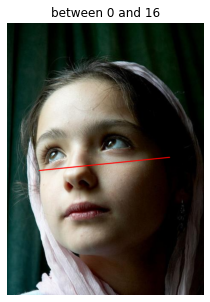

In [18]:
#두 점 사이의 거리 구하기 함수===============
def get_face_size(land_0, land_16):
    #두 점 사이의 거리 구하기 z = sqr((x2-x1)^2 + (y2-y1)^2)
    s1, s2 = np.array(land_0), np.array(land_16)
    face_size = int(np.sqrt(((s2 - s1)**2).sum()).round())   #관자놀이 직선 길이
    sticker_size = int(round(face_size * 0.8))
    return face_size, sticker_size
#End==========================================


my_image_path = "./img/imgset/angle/3.jpg"   #위 옆모습
img = cv2.imread(my_image_path)

img = resize_img(img, 640)   #img 사이즈 변경
list_landmarks = get_landmark(img)   #landmark 얻기

landmark = list_landmarks[0]

face_size, sticker_size = get_face_size(landmark[0], landmark[16])   #얼굴 사이즈와 스티커 사이즈 구하기

    
cv2.line(img, landmark[0], landmark[16], (255, 0, 0), thickness=2, lineType=cv2.LINE_AA)   #라인 그리기


print("\nface_size:", face_size)
print("sticker_size:", sticker_size)


plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title("between 0 and 16")
plt.axis('off')
plt.show()

#### 5.2 얼굴 각도에 따른 스티커 회전각 정의
***
<span style="font-size:12pt; line-height:1.5; font-family:Serif;">
    &nbsp; &nbsp; 얼굴이 기울어져 있다면, 합성되는 이미지도 함께 회전할 필요가 있다. 얼굴의 회전 정도를 판단하기 위해 눈꼬리 간(landmark 36, 45)의 직선을 검출하여 그 각을 이용하였다. 해당 각을 그대로 합성될 이미지에 적용하지 않고 적절한 테스트를 통하여 최종적으로 0.7의 상수를 적용 하였다. 관자놀이가 아닌 눈꼬리를 기준으로 한 것은 눈꼬리 간 직선의 각이 관자놀이 간 직선의 각보다 더 두드러 지기 때문이다. 아래 사진(between 36 and 45)는 관자놀이 간 직선과 눈꼬리간 직선을 시각화 한 것이다.
</span>

***

eye_degree: 7.973441491164329


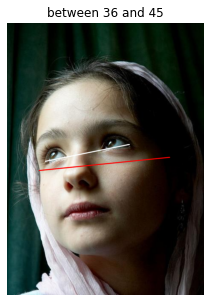

In [19]:
#눈꼬리 간 좌표================
def get_eye_degree(land_36, land_45):
    EYE_DEGREE = 0.7   #상수
    eye_left, eye_right = np.array(land_36), np.array(land_45)
    
    x, y = (eye_left - eye_right)
    y *= -1

    atan = math.atan(y / x)   #atan을 이용한 끼인각 획득
    eye_degree = atan * 180 / math.pi * EYE_DEGREE   #호도법 => 각도 전환 및 상수 적용
    return eye_degree
# #End===========================

eye_degree = get_eye_degree(landmark[36], landmark[45])

print("eye_degree:", eye_degree)

copy_img = img.copy()
cv2.line(copy_img, landmark[36], landmark[45], (255, 255, 255), thickness=2, lineType=cv2.LINE_AA)

plt.figure(figsize=(5, 5))
plt.imshow(copy_img)
plt.title("between 36 and 45")
plt.axis('off')
plt.show()

#### 5.3 얼굴 방향 파악
***
<span style="font-size:12pt; line-height:1.5; font-family:Serif;">
    &nbsp; &nbsp; 얼굴이 어느 방향을 향하고 있는지 파악하기 위해 관자놀이-턱을 잇는 평면을 구한 후, 관자놀이 간의 중심 좌표와 미간(landmark 27)을 이음으로하여 평면의 법선이 되는 기준을 잡는다(실제 법선은 아니지만 그렇게 간주한다). 이를 토대로 얼굴이 위를 향하고 있는지 혹은 고개를 왼쪽으로 돌렸는지와 같은 얼굴 방향과 그 정도를 파악할 수 있다. 이미지(flat)은 얼굴의 평면을 보여주며, 이미지(look vector)는 평면의 법선을 시각화 한 것이다.
</span>

***

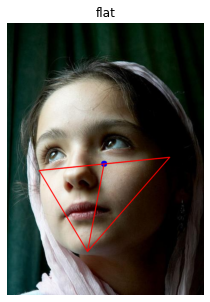

In [20]:
#얼굴 중심 좌표 얻기====
def get_face_center_xy(land_0, land_16):    
    s1, s2 = np.array(land_0), np.array(land_16)
    xy = np.subtract(s2, s1)   #관자놀이 간 차이
    atan = math.atan(xy[1] / xy[0])   #관자놀이 간 각도
    
    height = math.sin(atan) * face_size * 0.5   #빗변을 이용하여 높이 구하기
    width = height / math.tan(atan)   #가로 길이 구하기
    wh = (int(land_0[0]+width), int(land_0[1]+height))
    return wh
#End====================

wh = get_face_center_xy(landmark[0], landmark[16])

#얼굴 평면 그리기=======
cv2.circle(img, (wh), 10, (0, 0, 255), -1)
cv2.line(img, wh, landmark[8], (255, 0, 0), thickness=2, lineType=cv2.LINE_AA)   #법선-턱

cv2.line(img, landmark[0], landmark[16], (255, 0, 0), thickness=2, lineType=cv2.LINE_AA)
cv2.line(img, landmark[0], landmark[8], (255, 0, 0), thickness=2, lineType=cv2.LINE_AA)
cv2.line(img, landmark[8], landmark[16], (255, 0, 0), thickness=2, lineType=cv2.LINE_AA)
#End====================


plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title("flat")
plt.axis('off')
plt.show()

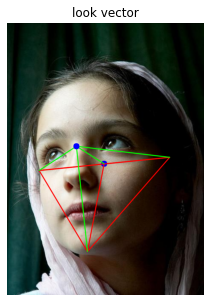

In [21]:
#얼굴 평면 그리기=======
cv2.line(img, wh, landmark[27], (0, 255, 0), thickness=2, lineType=cv2.LINE_AA)   #법선

cv2.line(img, landmark[0], landmark[27], (0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
cv2.line(img, landmark[8], landmark[27], (0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
cv2.line(img, landmark[16], landmark[27], (0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
cv2.circle(img, landmark[27], 10, (0, 0, 255), -1)
#End====================

plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title("look vector")
plt.axis('off')
plt.show()

#### 얼굴 방향 및 정도 도출
***
+ 법선을 잇는 좌표 간의 차이를 통해 얼굴 방향을 구할 수 있다. 이를 얼굴의 크기로 나누어 방향의 정도를 얻을 수 있다. 본 예제에서는 관자놀이 간 폭의 반을 해당 값에 나눠 주었다. 또한 합성될 이미지에 적절한 변형을 주기 위해, 테스트를 거쳐 HEAD_UP_DOWN, HEAD_LEFT_RIGHT 상수를 적용하였다.
***

In [22]:
#27과 법선 차이를 통해 얼굴 방향 구하기========
def get_face_difection(land_27, wh_vector, face_size):
    HEAD_UP_DOWN = -2.0
    HEAD_LEFT_RIGHT = -0.35

    half_face = int(face_size/2)

    #-: 위에서 인물을 내려다보는 구도, +: 인물을 아래에서 올려다보는 구도
    head_ud = (land_27[1] - wh_vector[1]) / half_face

    #-: 인물이 오른쪽을 봄, +: 인물이 왼쪽을 봄
    head_lr = (land_27[0] - wh_vector[0]) / half_face
    
    #상수 적용
    head_ud *= HEAD_UP_DOWN   
    head_lr *= HEAD_LEFT_RIGHT
    return head_ud, head_lr
#End==========================================

head_ud, head_lr = get_face_difection(landmark[27], wh, face_size)

print("look_up_down_direction:", head_ud)
print("look_left_right_direction:", head_lr)

look_up_down_direction: 0.5352112676056338
look_left_right_direction: 0.14788732394366197


#### 5.4 스티커 변형
***
<span style="font-size:12pt; line-height:1.5; font-family:Serif;">
    &nbsp; &nbsp; 앞서 구한 합성 이미지의 사이즈와 회전각, 투시변환 정도 값을 이용하여 스티커 변형을 진행한다. 아래 이미지는 변형된 '고양이 수염' 이미지와 얼굴 이미지를 시각화 한 것이다. '고양이 수염' 이미지에 적절한 회전과 원근법이 적용된 것을 확인할 수 있다.
</span>

***

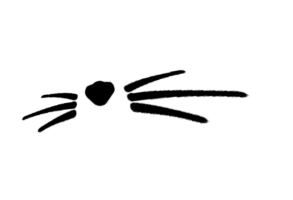

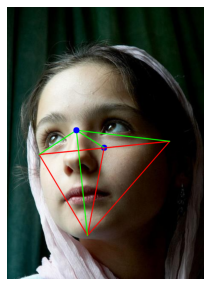

In [23]:
#스티커 변형 함수============================================
def edit_sticker(sticker, sticker_size, head_ud, head_lr, eye_degree):
    return_sticker = sticker.copy()
    cols = rows = sticker_size
    sticker_center = int(sticker_size / 2)
    
    #투시 변환==================================
    pts1 = np.float32([
        (sticker_center - 5, sticker_center - 10),
        (sticker_center + 5, sticker_center - 10),
        (sticker_center - 5, sticker_center),
        (sticker_center + 5, sticker_center)
    ])
    
    pts2 = np.float32([
        (sticker_center - 5 + head_ud, sticker_center - 10 + head_lr),
        (sticker_center + 5, sticker_center - 10),
        (sticker_center - 5, sticker_center),
        (sticker_center + 5, sticker_center)
    ])
    
    mtrx = cv2.getPerspectiveTransform(pts1, pts2)
    return_sticker = cv2.warpPerspective(
        return_sticker, mtrx, (int(cols * 1.5), rows),
        borderValue = [255, 255, 255, 255]   #여백 흰색
    ) 
    #End==========================================
    
    #이미지 회전==================================
    rot = cv2.getRotationMatrix2D((sticker_center, sticker_center), eye_degree, 1)   #스티커 중심으로 eye_degree 만큼 회전
    return_sticker = cv2.warpAffine(return_sticker, rot, (0, 0), borderValue = [255, 255, 255, 255])   #여백은 흰색
    #End==========================================
    
    return return_sticker
#End===========================================================


sticker_path = "./img/sticker/sticker.png"
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (sticker_size, sticker_size))

img_sticker = edit_sticker(img_sticker, sticker_size, head_ud, head_lr, eye_degree)


plt.figure(figsize=(5, 5))
plt.imshow(img_sticker)
plt.axis('off')
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.axis('off')
plt.show()

#### 5.4 이미지와 스티커 합치기
***
+ '고양이 수염' 이미지를 코의 윗 부분(landmark 30)에 합성한다.
***

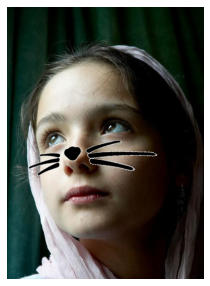

In [24]:
#이미지 + 스티커================
def combine_sticker(img, sticker, sticker_size, land_30):
    return_img = img.copy()
    refined_x = land_30[0]-int(sticker_size * 0.5)
    refined_y = land_30[1]-int(sticker_size * 0.5)

    #sticker가 위치할 곳에 미리 배경을 투명하게 만든다.
    sticker_area = return_img[refined_y:refined_y + sticker.shape[0], refined_x:refined_x + sticker.shape[1]]
    return_img[refined_y:refined_y + sticker.shape[0], refined_x:refined_x + sticker.shape[1]] = \
        np.where(sticker==255, sticker_area,sticker).astype(np.uint8)
    return return_img
#End=============================

img = cv2.imread(my_image_path)
img = resize_img(img, 640, False)   #img 사이즈 변경
img = combine_sticker(img, img_sticker, sticker_size, landmark[30])    

plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.axis('off')
plt.show()

#### 5.5 각 기능 통합 및 적용

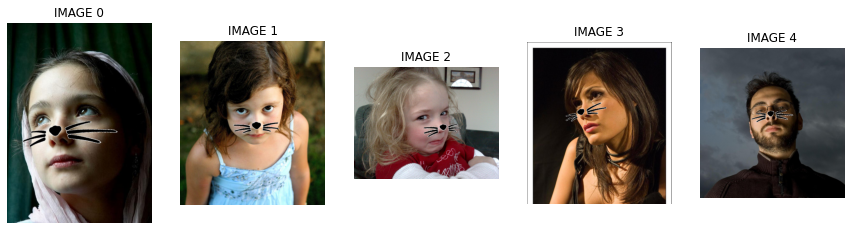

In [25]:
img_list = get_img_data("./img/imgset/angle/")
sticker_path = "./img/sticker/sticker.png"
origin_sticker = cv2.imread(sticker_path)


edit_img_list = []
for img in img_list:
    img = resize_img(img, 640, False)   #img 사이즈 변경
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    list_landmarks = get_landmark(img)   #landmark 얻기
    
    for landmark in list_landmarks:
        face_size, sticker_size = get_face_size(landmark[0], landmark[16])   #얼굴 사이즈와 스티커 사이즈 구하기
        eye_degree = get_eye_degree(landmark[36], landmark[45])
        wh = get_face_center_xy(landmark[0], landmark[16])
        head_ud, head_lr = get_face_difection(landmark[27], wh, face_size)
        
        img_sticker = origin_sticker.copy()
        img_sticker = cv2.resize(img_sticker, (sticker_size, sticker_size))
        img_sticker = edit_sticker(img_sticker, sticker_size, head_ud, head_lr, eye_degree)
        
    edit_img_list.append(combine_sticker(img, img_sticker, sticker_size, landmark[30]))
        
show_img_list(edit_img_list)   #이미지 시각화

### 6. 결론
***
<span style="font-size:12pt; line-height:1.5; font-family:Serif;">
    &nbsp; &nbsp; openCV와 dlib 라이브러리를 이용하여 이미지로부터 얼굴을 검출하고 얼굴의 랜드마크를 추출하는 예제를 진행하였다. 다양한 변수에서의 얼굴인식은 '얼굴 일부가 크롭된 이미지', '90˚에서 180˚로 회전된 이미지'를 제외한 안경을 낀 경우, 한 명 이상인 경우, 다양한 얼굴의 구도 이미지인 경우, 어두운 환경의 이미지인 경우 모두 얼굴이 올바르게 인식된 것을 확인하였다.
</span><br><br>

<span style="font-size:12pt; line-height:1.5; font-family:Serif;">
    &nbsp; &nbsp; 또한, 랜드마크에 이미지를 합성하는 예제를 진행하였다. 합성될 이미지의 사이즈와 회전각, 원근 변환 정도를 정의하여 변형 후 합성을 시행하였다. 이미지의 사이즈는 관자놀이 폭의 0.8배를 취하였으며, 회전각은 양 눈꼬리를 직선으로 이어 구한 각에 자체적으로 설정한 상수를 적용하여 구하였다. 또한, 원근법을 적용하기위해 평면과 법선을 임의로 그려 법선 좌표 간의 차이를 통해 얼굴의 방향과 그 정도를 구하였으며, 해당 값에 자체적으로 설정한 상수를 적용하였다. 이를 토대로 합성될 이미지를 변형한 후 최종적으로 합성을 시행하였다.

***

#### 형상관리
***
+ v1_1: 초기버전


+ v1_2: 얼굴각도 적용


+ v2_1: 기능 모듈화

***

#### 회고
***
예제 진행 시 난항을 겪었던 사항은 크게 세가지이다. 첫 번째는 데이터셋을 구하고 이미지를 상황별로 구분 하는 것이었다. 우선, 얼굴 데이터셋을 구하는 데에 많은 시간을 소요했으며, 방대한 데이터셋으로부터 원하는 이미지를 찾고 이를 다시 구성하는 것이 번거로운 작업이었다. 두 번째는 '고양이 스티커' 이미지 변형 방법을 구상하는 부분이었다. '어떻게 해야 자연스럽게 합성이 될까'라는 질문을 되뇌이며 적절한 이미지 변형을 위해 많은 시간 고민하였다. 세 번째는 합성될 이미지에 원근법을 적용하여 변형하는 것이었다. 막연하게 양 관자놀이와 미간을 이으면 생기는 삼각형으로부터 얼굴의 방향을 파악할 수 있음을 느꼈는데, 이를 구체적으로 개념화, 체계화 하기 위해 많은 시간을 소요하였다.

***